**Dependencies**

In [0]:
# Add Object Detection API Libraries to PYTHONPATH
%cd /content/datalab/models/research
%env PYTHONPATH=$PYTHONPATH:/content/datalab/models/research:/content/datalab/models/research/slim

In [0]:
!pip install --user python-resize-image
!git clone https://github.com/gmikels/cloud-cmle-mobilenet.git

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
from PIL import Image
import numpy as np
from resizeimage import resizeimage

**Load Image for Inference**

In [2]:
IMAGE_PATH = "/content/datalab/image1.jpg"

def load_image_into_numpy_array(image):
  image = resizeimage.resize_crop(image, [300, 300])
  (im_width, im_height) = image.size
  print(image.size)
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

image = Image.open(IMAGE_PATH)
image_np = load_image_into_numpy_array(image)
image_np_expanded = np.expand_dims(image_np, axis=0)

image_tfdata = tf.data.Dataset.from_tensor_slices((image_np_expanded)).batch(1)

(300, 300)


**Load TFLite Model**

In [0]:
TFLITE_PATH = "/content/datalab/cloud-cmle-mobilenet/detect.tflite"

interpreter = tf.contrib.lite.Interpreter(model_path=TFLITE_PATH)
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]["index"]
output_detection_classes = interpreter.get_output_details()[3]["index"]

**Run Inference on Image**

In [0]:
for img in image_tfdata.take(1):
  break
interpreter.set_tensor(input_index, img)
interpreter.invoke()
detection_classes = interpreter.get_tensor(output_detection_classes)

**Print Output**

In [38]:
%cd /content/models/research
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

/content/models/research


In [40]:
LABELS = "/content/datalab/cloud-cmle-mobilenet/pet_label_map.pbtxt"

category_index = label_map_util.create_category_index_from_labelmap(LABELS, use_display_name=True)
print(category_index)

{1: {'id': 1, 'name': u'Abyssinian'}, 2: {'id': 2, 'name': u'american_bulldog'}, 3: {'id': 3, 'name': u'american_pit_bull_terrier'}, 4: {'id': 4, 'name': u'basset_hound'}, 5: {'id': 5, 'name': u'beagle'}, 6: {'id': 6, 'name': u'Bengal'}, 7: {'id': 7, 'name': u'Birman'}, 8: {'id': 8, 'name': u'Bombay'}, 9: {'id': 9, 'name': u'boxer'}, 10: {'id': 10, 'name': u'British_Shorthair'}, 11: {'id': 11, 'name': u'chihuahua'}, 12: {'id': 12, 'name': u'Egyptian_Mau'}, 13: {'id': 13, 'name': u'english_cocker_spaniel'}, 14: {'id': 14, 'name': u'english_setter'}, 15: {'id': 15, 'name': u'german_shorthaired'}, 16: {'id': 16, 'name': u'great_pyrenees'}, 17: {'id': 17, 'name': u'havanese'}, 18: {'id': 18, 'name': u'japanese_chin'}, 19: {'id': 19, 'name': u'keeshond'}, 20: {'id': 20, 'name': u'leonberger'}, 21: {'id': 21, 'name': u'Maine_Coon'}, 22: {'id': 22, 'name': u'miniature_pinscher'}, 23: {'id': 23, 'name': u'newfoundland'}, 24: {'id': 24, 'name': u'Persian'}, 25: {'id': 25, 'name': u'pomeranian'}

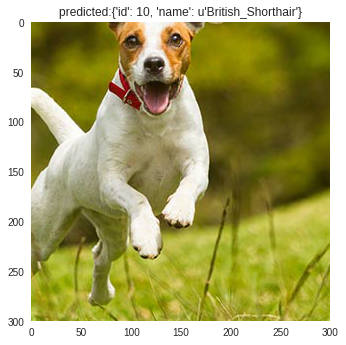

In [53]:
import matplotlib.pylab as plt

plt.imshow(img[0])
template = "predicted:{predict}"
_ = plt.title(template.format(predict=category_index[detection_classes[0]]))
plt.grid(False)